In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

from spread_classification.visualization.plot_data_stats import *

# plt.style.use('dark_background')

In [12]:
stats_dir = "../data/stats"
run_name = "sysomos"
with open(os.path.join(stats_dir, f"{run_name}.json")) as file:
    stats = json.load(file)

In [10]:
def in_range(arr):
    return arr[arr <= 10]

(array([29669.,  2864.,   776.,   358.,   197.,   114.,    85.,    87.,
           64.,    33.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

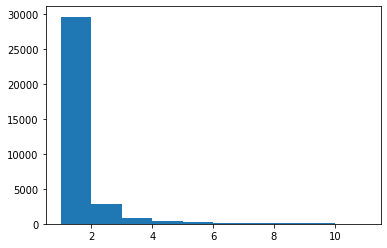

In [15]:
sizes = in_range(np.array(list(stats["cascades"].values())))
plt.hist(sizes, range=(1, 11))

In [18]:
len(sizes)

34247

In [17]:
len(sizes[sizes >= 6])

383

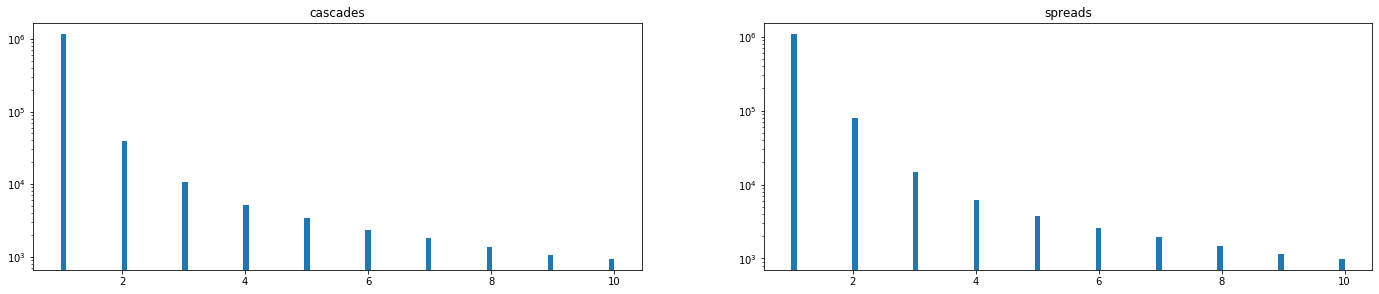

In [11]:
branches_keys = ["cascades", "spreads"]
sizes_keys = [
    *branches_keys, 
#     "full_size", 
#     *[f"pruned_{length}_size" for length in range(2, 11)],
]
sizes_arrays = np.array([
    *[in_range(np.array(list(stats[key].values()))) for key in branches_keys],
#     *[non_zero(np.array(stats[key])) for key in sizes_keys[2:]], 
])
plot_histograms(sizes_arrays, sizes_keys, stats_dir, run_name, "branch_sizes")

# keys = ["full_size", *[f"pruned_{length}_size" for length in range(2, 11)]]
# pruned_lens = [sum(stats[key]) for key in keys]
# plot(pruned_lens, [str(x) for x in range(1, 11)], "total tweets per prune level", stats_dir, run_name, "count")

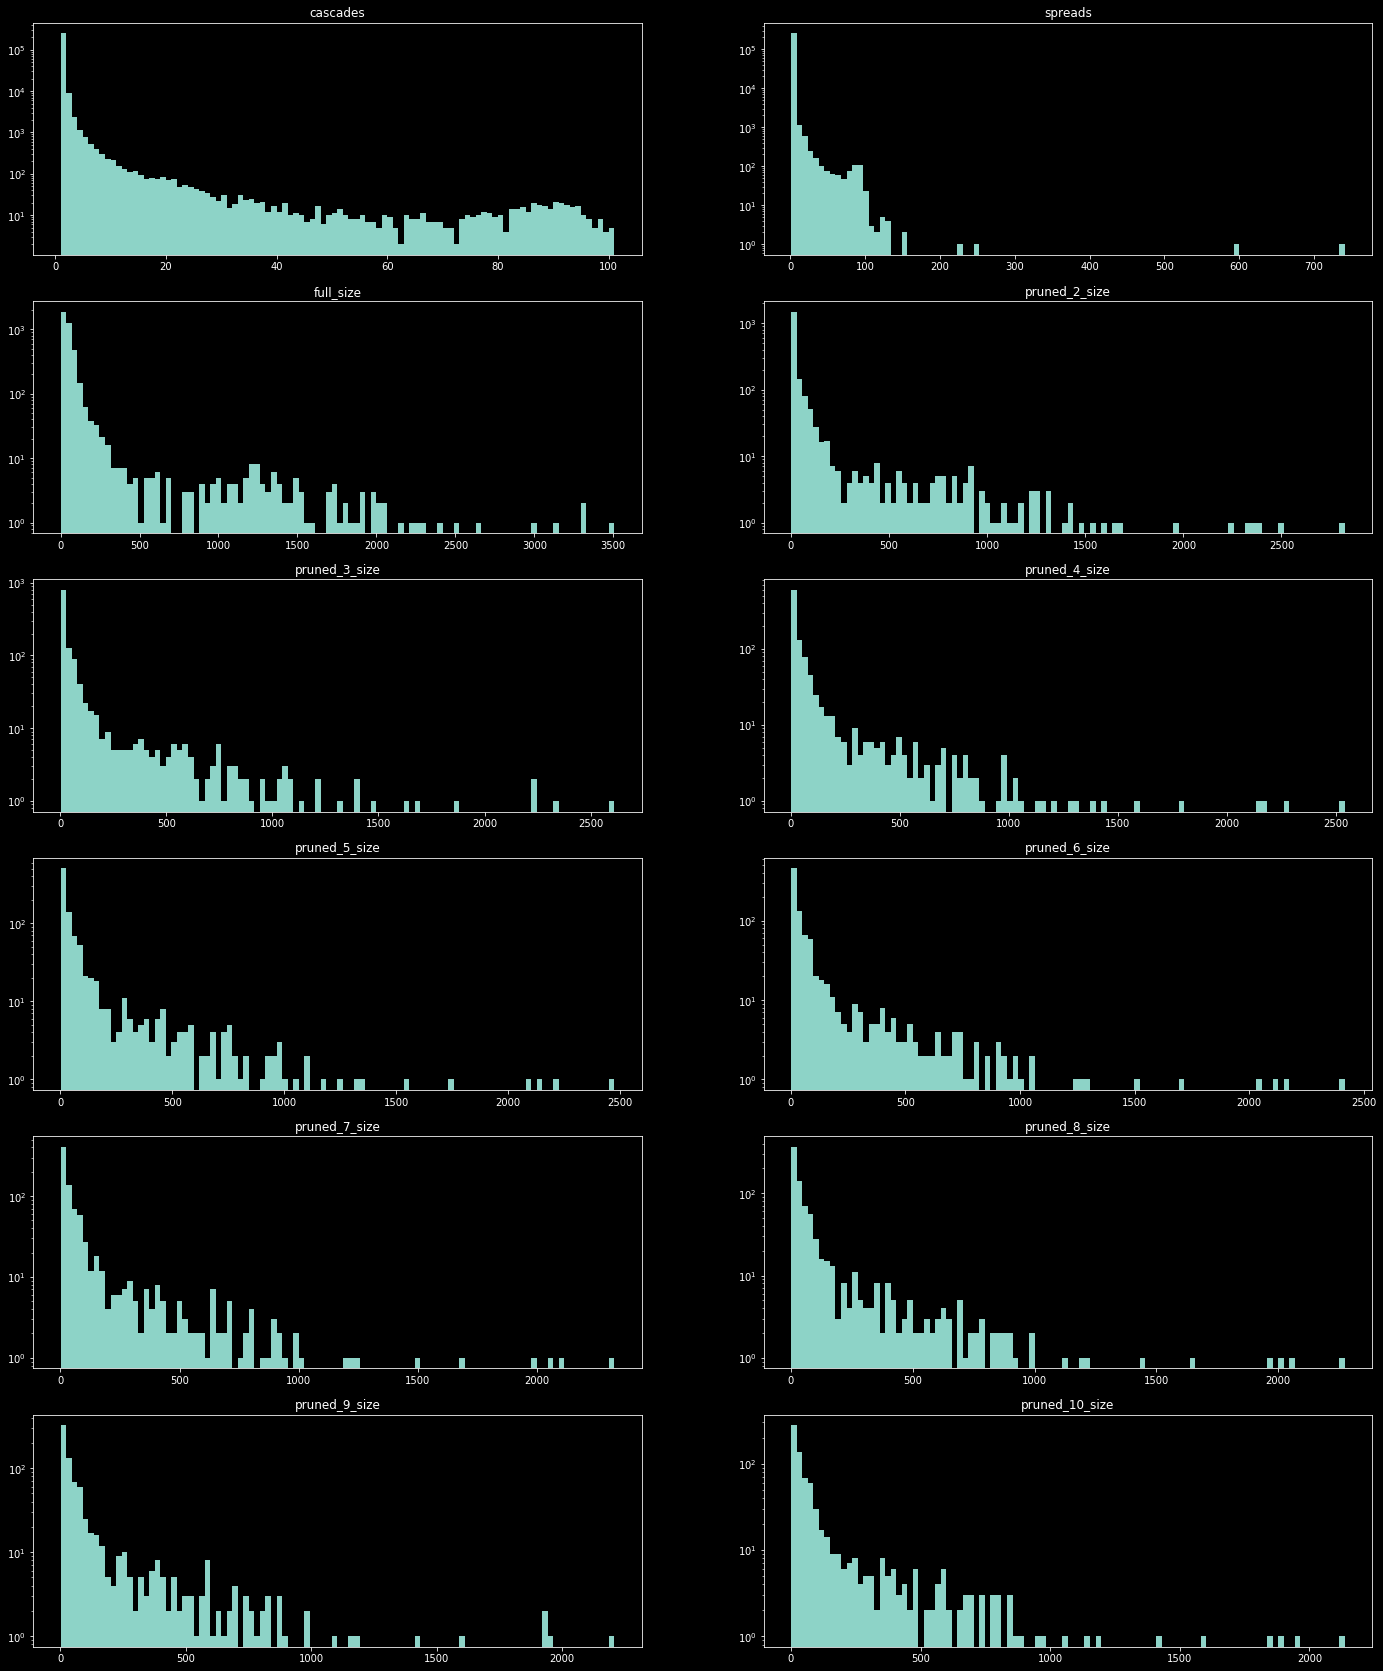

In [199]:
branches_keys = ["cascades", "spreads"]
sizes_keys = [
    *branches_keys, 
    "full_size", 
    *[f"pruned_{length}_size" for length in range(2, 11)],
]
sizes_arrays = np.array([
    *[np.array(list(stats[key].values())) for key in branches_keys],
    *[non_zero(np.array(stats[key])) for key in sizes_keys[2:]], 
])
plot_histograms(sizes_arrays, sizes_keys, "sizes")

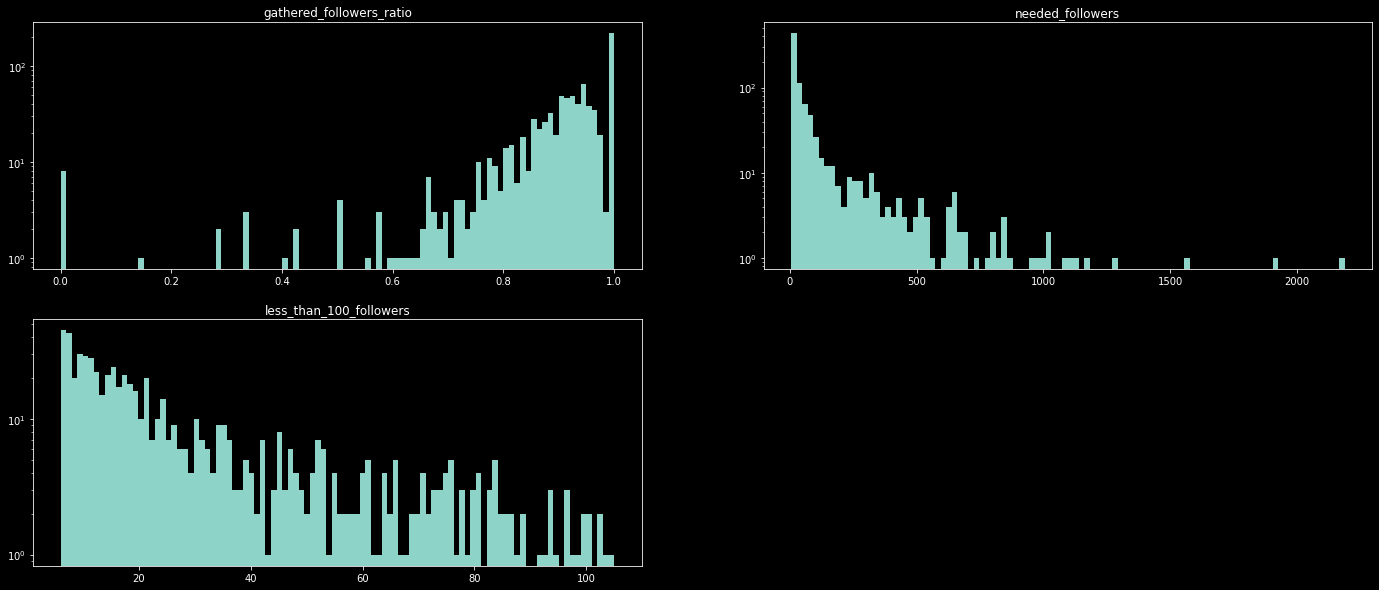

In [189]:
needed_followers = np.array(stats["needed_followers"])
available_followers =  np.array(stats["available_followers"])
followers_indices = np.where(needed_followers > 5)
needed_followers = needed_followers[followers_indices]
available_followers = available_followers[followers_indices]

less_than_100_followers = needed_followers[np.where(needed_followers <= 105)]
followers_ratio = available_followers / needed_followers

followers_keys = np.array(["gathered_followers_ratio", "needed_followers", "less_than_100_followers"])
followers_arrays = np.array([followers_ratio, needed_followers, less_than_100_followers])
plot_histograms(followers_arrays, followers_keys, "followers")